!conda activate crypto

In [1]:
%%time
#-------------------
# Web scraping Yahoo Finance
#-------------------
from bs4 import BeautifulSoup
import requests
import pandas as pd

dic = {}
url = 'https://finance.yahoo.com/cryptocurrencies?offset=0&count=100'
soup = BeautifulSoup(requests.get(url).text)

# store values in separate lists and then in a dictionary
for listing in soup.find_all('div', attrs={'id':'fin-scr-res-table'}):
    symbol_list = []
    name_list = []
    price_list = []
    change_list = []
    mcap_list = []
for symbol in listing.find_all('td', attrs={'aria-label':'Symbol'}):
    symbol_list.append(symbol.text)
    dic['Symbol'] = symbol_list
for name in listing.find_all('td', attrs={'aria-label':'Name'}):
    name_list.append(name.text)
    dic['Name'] = name_list
for price in listing.find_all('td', attrs={'aria-label':'Price (Intraday)'}):
    price_list.append(price.text)
    dic['Price'] = price_list
for change in listing.find_all('td', attrs={'aria-label':'% Change'}):
    change_list.append(change.text)
    dic['% Change'] = change_list
for mcap in listing.find_all('td', attrs={'aria-label':'Market Cap'}):
    mcap_list.append(mcap.text)
    dic['Market Cap'] = mcap_list
      
# create a dataframe from dictionary 
df_scrape = pd.DataFrame(dic)
df_scrape.Symbol = df_scrape.Symbol.str.replace('-USD','')
df_scrape.Name = df_scrape.Name.str.replace(' USD','')

CPU times: user 973 ms, sys: 154 ms, total: 1.13 s
Wall time: 1.7 s


In [2]:
df_scrape.shape

(25, 5)

In [3]:
df_scrape

Symbol             Name      Price % Change Market Cap
0     BTC          Bitcoin  37,955.11   -1.19%   722.194B
1     ETH         Ethereum   2,763.44   -1.47%    333.28B
2    USDT           Tether     1.0002   +0.01%    83.172B
3     BNB     Binance Coin     384.00   -2.27%    62.698B
4    USDC         USD Coin     1.0001   +0.03%    49.258B
5     SOL           Solana      87.73   -5.48%    29.337B
6     HEX              HEX   0.165653   -8.18%    28.726B
7     XRP              XRP   0.592676   -3.98%    28.511B
8   LUNA1            Terra      79.68   -2.77%    27.499B
9     ADA          Cardano   0.773429   -3.24%    26.105B
10    UST         TerraUSD     1.0009   -0.09%    18.528B
11   BUSD          Binance     1.0010   +0.03%    17.706B
12   DOGE         Dogecoin   0.131755   -1.16%     17.48B
13   AVAX        Avalanche      58.20   -4.84%    15.634B
14    DOT         Polkadot      14.96   -5.06%    14.779B
15   SHIB        SHIBA INU   0.000021   -4.53%    11.509B
16   WBTC  Wrapped Bitcoin  37,916.12   -1.18%    10.689B
17  STETH       Lido stETH   2,748.98   -1.45%     9.588B
18    DAI              Dai   0.999584   +0.04%     8.788B
19  MATIC          Polygon     1.0845   -3.60%     8.512B
20    CRO  Crypto.com Coin   0.332459   -9.53%     8.399B
21   NEAR    NEAR Protocol      11.00   -3.09%      7.42B
22   WTRX     Wrapped TRON   0.068104   +7.78%     6.925B
23    TRX             TRON   0.068075   +7.93%     6.917B
24    LTC         Litecoin      96.66   -4.15%     6.785B

In [4]:
import yfinance as yf
df = yf.download(tickers='BTC-USD', period = '5y', interval = '1d')

[*********************100%***********************]  1 of 1 completed


In [5]:
df

Open          High           Low         Close  \
Date                                                                 
2017-05-01   1348.300049   1434.319946   1348.300049   1421.599976   
2017-05-02   1421.030029   1473.900024   1415.689941   1452.819946   
2017-05-03   1453.780029   1492.770020   1447.489990   1490.089966   
2017-05-04   1490.719971   1608.910034   1490.719971   1537.670044   
2017-05-05   1540.869995   1618.030029   1530.310059   1555.449951   
...                  ...           ...           ...           ...   
2022-04-27  38120.300781  39397.917969  37997.312500  39241.121094   
2022-04-28  39241.429688  40269.464844  38941.421875  39773.828125   
2022-04-29  39768.617188  39887.269531  38235.535156  38609.824219   
2022-04-30  38605.859375  38771.210938  37697.941406  37714.875000   
2022-05-01  37715.718750  38116.277344  37610.785156  38004.464844   

               Adj Close       Volume  
Date                                   
2017-05-01   1421.599976    713624000  
2017-05-02   1452.819946    477337984  
2017-05-03   1490.089966    583795968  
2017-05-04   1537.670044    933548992  
2017-05-05   1555.449951    946035968  
...                  ...          ...  
2022-04-27  39241.121094  30981015184  
2022-04-28  39773.828125  33903704907  
2022-04-29  38609.824219  30882994649  
2022-04-30  37714.875000  23895713731  
2022-05-01  38004.464844  26912634880  

[1827 rows x 6 columns]

In [6]:
import pandas as pd
import plotly.graph_objs as go

In [7]:
# compute moving averages
df['MA100'] = df.Close.rolling(100).mean()
df['MA50'] = df.Close.rolling(50).mean()
df['MA20'] = df.Close.rolling(20).mean()

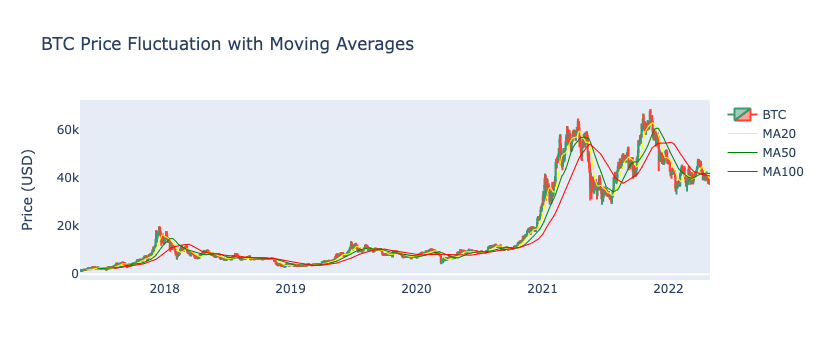

In [8]:
# Plotly candlestick chart
from plotly.offline import iplot
fig = go.Figure(data=
                [go.Candlestick(x=df.index,
                                open=df.Open, 
                                high=df.High,
                                low=df.Low,
                                close=df.Close,
                                name=f'BTC'), 
                go.Scatter(x=df.index, y=df.MA20, 
                            line=dict(color='yellow',width=1),name='MA20'),
                go.Scatter(x=df.index, y=df.MA50, 
                            line=dict(color='green',width=1),name='MA50'),
                go.Scatter(x=df.index, y=df.MA100, 
                            line=dict(color='red',width=1),name='MA100')])
    
fig.update_layout(go.Layout(xaxis = {'showgrid': False},
                  yaxis = {'showgrid': False}),
                  title=f'BTC Price Fluctuation with Moving Averages',
                    yaxis_title=f'Price (USD)', 
                    xaxis_rangeslider_visible=False)

fig.show()

# Create markowitz portfolio

In [9]:
ticker_list = list(df_scrape["Symbol"])

In [13]:
data = yf.download(
    tickers=ticker_list, # Set thread value to true
    #group_by='tickers',
    threads=True,
    period = '5y', 
    interval = '1d'
)

[*********************100%***********************]  25 of 25 completed

13 Failed downloads:
- ETH: No data found, symbol may be delisted
- SHIB: No data found, symbol may be delisted
- STETH: No data found, symbol may be delisted
- USDT: No data found, symbol may be delisted
- XRP: No data found for this date range, symbol may be delisted
- AVAX: No data found, symbol may be delisted
- BUSD: No data found, symbol may be delisted
- HEX: No data found for this date range, symbol may be delisted
- DOGE: No data found, symbol may be delisted
- WBTC: No data found, symbol may be delisted
- MATIC: No data found, symbol may be delisted
- DOT: No data found for this date range, symbol may be delisted
- LUNA1: No data found, symbol may be delisted


In [14]:
data.Close

ADA  AVAX  BNB         BTC  BUSD  CRO  DAI  DOGE  DOT  ETH  ...  \
Date                                                                    ...   
2020-10-01  NaN   NaN  NaN  100.000000   NaN  NaN  NaN   NaN  NaN  NaN  ...   
2020-10-02  NaN   NaN  NaN  100.000000   NaN  NaN  NaN   NaN  NaN  NaN  ...   
2020-10-05  NaN   NaN  NaN   99.995003   NaN  NaN  NaN   NaN  NaN  NaN  ...   
2020-10-06  NaN   NaN  NaN  100.029999   NaN  NaN  NaN   NaN  NaN  NaN  ...   
2020-10-07  NaN   NaN  NaN   99.919998   NaN  NaN  NaN   NaN  NaN  NaN  ...   
...         ...   ...  ...         ...   ...  ...  ...   ...  ...  ...  ...   
2020-09-25  NaN   NaN  NaN         NaN   NaN  NaN  NaN   NaN  NaN  NaN  ...   
2020-09-28  NaN   NaN  NaN         NaN   NaN  NaN  NaN   NaN  NaN  NaN  ...   
2020-09-29  NaN   NaN  NaN         NaN   NaN  NaN  NaN   NaN  NaN  NaN  ...   
2020-09-30  NaN   NaN  NaN         NaN   NaN  NaN  NaN   NaN  NaN  NaN  ...   
2022-04-29  NaN   NaN  NaN         NaN   NaN  NaN  NaN   NaN  NaN  NaN  ...   

            SHIB   SOL  STETH   TRX    USDC  USDT        UST  WBTC  WTRX  XRP  
Date                                                                           
2020-10-01   NaN  2.16    NaN  0.71  0.0001   NaN  75.959999   NaN   NaN  NaN  
2020-10-02   NaN  2.07    NaN  0.67  0.0001   NaN  75.830002   NaN   NaN  NaN  
2020-10-05   NaN  2.13    NaN  0.70  0.0001   NaN  74.949997   NaN   NaN  NaN  
2020-10-06   NaN  2.64    NaN  0.69  0.0001   NaN  75.279999   NaN   NaN  NaN  
2020-10-07   NaN  3.50    NaN  0.70  0.0001   NaN  74.769997   NaN   NaN  NaN  
...          ...   ...    ...   ...     ...   ...        ...   ...   ...  ...  
2020-09-25   NaN  2.14    NaN  0.69  0.0001   NaN  76.190002   NaN   NaN  NaN  
2020-09-28   NaN  2.21    NaN  0.69  0.0001   NaN  76.160004   NaN   NaN  NaN  
2020-09-29   NaN  2.10    NaN  0.71  0.0001   NaN  76.290001   NaN   NaN  NaN  
2020-09-30   NaN  2.07    NaN  0.70  0.0001   NaN  75.930000   NaN   NaN  NaN  
2022-04-29   NaN  4.82    NaN  0.30     NaN   NaN  54.340000   NaN   NaN  NaN  

[1260 rows x 25 columns]

In [12]:
yf.download.__code__.co_varnames

('tickers',
 'start',
 'end',
 'actions',
 'threads',
 'group_by',
 'auto_adjust',
 'back_adjust',
 'progress',
 'period',
 'show_errors',
 'interval',
 'prepost',
 'proxy',
 'rounding',
 'timeout',
 'kwargs',
 '_tickers_',
 'ticker',
 'isin',
 'i',
 'data')